
# Project 2: Investigate a Dataset (No-show appointments!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we're going to investigate medical appointments dataset collected from Brazil. The dataset focused on answering whether the patients show up for their appointment or not. The dataset has multiple characteristics about the patient such as gender, age, insurance & ...etc. Furthermore, the dataset has 110527 rows in total with 14 columns.

> Our analysis will focus on answering two questions: First, the important factors to know whether a patient will show up for their scheduled appointment or not. This will be done by taking No-Show variable as a dependent variable and the rest as independent and test the whole dataset to come up with applicable correlation. Second, we will focus on the significant factors if exist together could prevent patients from showing the same dependent & independents variables as the first part but with significant changes in the dataset. We're going to separate the dataset and dive in the actual no show cases only.




In [73]:
# Importing the packages to be used in the project.
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## 1. Data Wrangling

> In this section of the report, we will prepare the dataset for analysis. This process involves change datatypes when needed, replace or remove null values if exist with values, drop duplicated rows, remove any unnecessary columns and understand the dataset.


In [74]:
# Load 'oshowappointments-kagglev2-may-2016.csv' dataset 
db_nsa = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Know the size of the dataset
db_nsa.shape 

(110527, 14)

In [75]:
# Display the first 10 rows to take a first look on the data
db_nsa.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [76]:
# Check the datatype of the variables & the null values
db_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [77]:
# Explore dataset more
db_nsa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [78]:
# Check the variables data types separately to apply some changes as needed
db_nsa.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [79]:
# Explore the No-Show variable two cases separtely
db = db_nsa.groupby(by='No-show').count()
db.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [80]:
# Explore the value count for each Neighbourhood in the dataset
db_nsa.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [81]:
# Check the duplicated rows to remove them when exist.
sum(db_nsa.duplicated())

0

In [82]:
# Double check for the null values, if exist remove or replace them.
db_nsa.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [83]:
# Convert PatientID type from float to int.
db_nsa.PatientId = db_nsa.PatientId.astype(int)

In [84]:
# Check if the changes reflected or not.
db_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [85]:
# Check if the same patient has more than one appointment.
db_nsa.PatientId.value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
986162815579582    34
88834999836575     34
712458866975343    33
6128878448536      30
416755661551767    30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
867726299814126     1
77425139319169      1
39423418767468      1
961392519656997     1
737858311826761     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371746       1
3212962263

In [86]:
# Split the date from time in ScheduledDay variable.

split_columns = ['ScheduledDay']

# apply split function and the split indicater is 'T'
for c in split_columns:
    db_nsa[c] = db_nsa[c].apply(lambda x: x.split("T")[0])
   

In [87]:
# Split the date from time in AppointmentDay variable.

split_columns = ['AppointmentDay']

# apply split function and the split indicater is 'T'
for c in split_columns:
    db_nsa[c] = db_nsa[c].apply(lambda x: x.split("T")[0])

In [88]:
# Check if the changes reflected or not.
db_nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
# Convert the type of ScheduledDay from String to datetime

db_nsa['ScheduledDay'] = db_nsa['ScheduledDay'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

In [90]:
# Convert the type of AppointmentDayfrom String to datetime

db_nsa['AppointmentDay'] = db_nsa['AppointmentDay'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

In [91]:
# Check the changes
db_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [92]:
# Extract the corresponding day of the ScheduledDay date
db_nsa['ScheduledDay'] = db_nsa['ScheduledDay'].dt.day_name()

In [93]:
# Check changes
db_nsa.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,Wednesday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,Wednesday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,Wednesday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,Wednesday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [94]:
# check if the AppointmentID appears more than once.
db_nsa.AppointmentID.value_counts()

5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
5717325    1
5711182    1
5758289    1
5762391    1
5741913    1
5483871    1
5660001    1
5653858    1
5666148    1
5668197    1
5641576    1
5639531    1
5649772    1
5645678    1
5647727    1
5692785    1
5686642    1
5694838    1
5696887    1
5674360    1
5733701    1
5651786    1
5672315    1
5719362    1
5672187    1
          ..
5744033    1
5748131    1
5739943    1
5672324    1
5682563    1
5680512    1
5782866    1
5496110    1
5713200    1
5711153    1
5717298    1
5709110    1
5707063    1
5729592    1
5463358    1
5565768    1
5776721    1
5789023    1
5590396    1
5606756    1
5608807    1
5635434    1
5621101    1
5686470    1
5582192    1
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64

In [95]:
# Drop AppointmentID column from the dataset.
db_nsa.drop(['AppointmentID'], axis=1, inplace=True)

In [96]:
# Check changes.
db_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 11.0+ MB


<a id='eda'></a>
## 2. Exploratory Data Analysis

> In this section, we're going to explore the dataset and try to answer our proposed questions. We're going to compute statistics and create visualizations addressing the research questions. At the end of our analysis, we're going to address the findings in the next section. 

### Q1. What factors are important to know whether a patient will show up for their scheduled appointment or not?

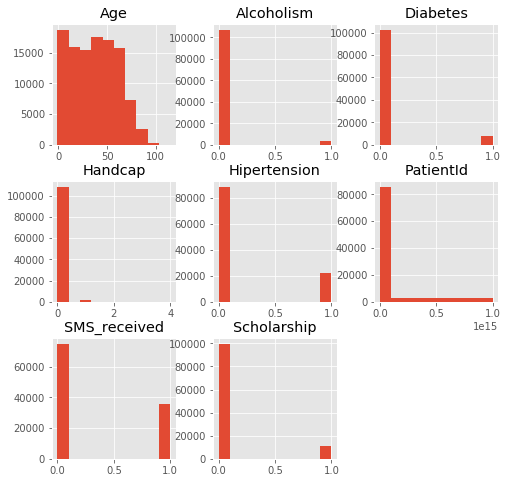

In [97]:
# Explore all numerical variables with histogram distribution for the whole dataset.
db_nsa.hist(figsize=(8, 8));

In [98]:
# Display the tail 50 rows from the dataset.
db_nsa.tail(50)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110477,27984936871939,F,Monday,2016-06-06,67,RESISTÊNCIA,0,0,1,0,0,1,No
110478,5478497292889,F,Monday,2016-06-06,27,RESISTÊNCIA,0,0,0,0,0,1,No
110479,4455243979994,F,Friday,2016-06-06,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110480,349293493115,F,Wednesday,2016-06-06,51,RESISTÊNCIA,0,0,0,0,0,1,No
110481,438363374339,F,Wednesday,2016-06-06,28,RESISTÊNCIA,0,0,0,0,0,1,No
110482,594422525164283,F,Friday,2016-06-06,43,RESISTÊNCIA,1,0,0,0,0,1,Yes
110483,1642781438442,F,Friday,2016-06-03,60,PRAIA DO CANTO,0,1,0,0,0,0,No
110484,513364984676544,F,Friday,2016-06-07,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110485,4865334421273,F,Thursday,2016-06-06,34,SANTA LUÍZA,0,0,0,0,0,0,No
110486,318415333348194,F,Wednesday,2016-06-08,60,MARIA ORTIZ,0,0,0,0,0,0,No


In [99]:
# Rename the No-show column with NoShow for easier use because we're going to refer to it a lot. 
db_nsa.rename(columns={'No-show':'NoShow'}, inplace=True)

In [100]:
# Group the Appointment days with noshow variable, to find the relationship between the days and noshow indicator.
db_nsa1 = db_nsa.groupby(['NoShow', 'ScheduledDay'])['ScheduledDay'].count()
db_nsa1


NoShow  ScheduledDay
No      Friday          15028
        Monday          18524
        Saturday           23
        Thursday        14373
        Tuesday         20877
        Wednesday       19383
Yes     Friday           3887
        Monday           4561
        Saturday            1
        Thursday         3700
        Tuesday          5291
        Wednesday        4879
Name: ScheduledDay, dtype: int64

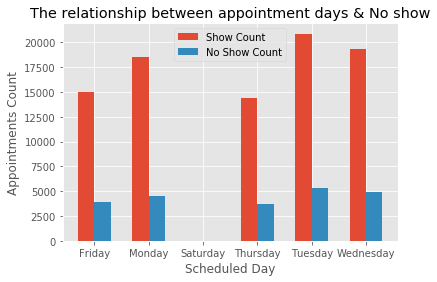

In [101]:
# source http://benalexkeen.com/bar-charts-in-matplotlib/
# visualize Appointment days with noshow variable by a bar chart.

plt.style.use('ggplot')
N = 6
Show_count = (15028, 18524, 23, 14373, 20877, 19383)
Noshow_count = (3887, 4561, 1, 3700, 5291, 4879)

ind = np.arange(N) 
width = 0.30      
plt.bar(ind, Show_count, width, label='Show Count')
plt.bar(ind + width, Noshow_count, width,
    label='No Show Count')

plt.ylabel('Appointments Count')
plt.xlabel('Scheduled Day')
plt.title('The relationship between appointment days & No show')

plt.xticks(ind + width / 2, ('Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'))
plt.legend(loc='best')
plt.show()

In [102]:
# visualize Appointment days with noshow variable by a bar chart.
# Old db_nsa1.plot(x='Month', y='number', kind='bar' , title='The relationship between appointment days & No show notification');

In [103]:
# Total Appointment days with noshow variable to compare it with the above result.
db_nsa2 = db_nsa.groupby('ScheduledDay').NoShow.count()
db_nsa2

ScheduledDay
Friday       18915
Monday       23085
Saturday        24
Thursday     18073
Tuesday      26168
Wednesday    24262
Name: NoShow, dtype: int64

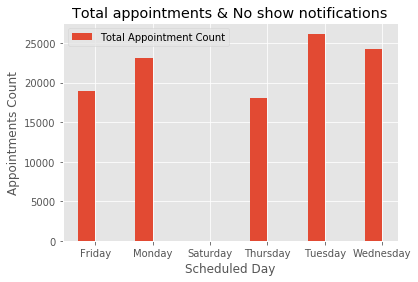

In [104]:
# source http://benalexkeen.com/bar-charts-in-matplotlib/
# visualize the total Appointment days with noshow variable by a bar chart.

N = 6
Total_count = (18915, 23085, 24, 18073, 26168, 24262)

ind1 = np.arange(N) 
width = 0.30      
plt.bar(ind1, Total_count, width, label='Total Appointment Count')

plt.ylabel('Appointments Count')
plt.xlabel('Scheduled Day')
plt.title('Total appointments & No show notifications')

plt.xticks(ind1 + width / 2, ('Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'))
plt.legend(loc='best')
plt.show()

In [105]:
# old Chart visualize the total Appointment days with noshow variable by a bar chart.
# db_nsa2.plot(kind='bar', title='Total appointments & No show notifications');

In [106]:
# Group SMS_received with noshow variable, to find the relationship between them.
db_nsas = db_nsa.groupby(['NoShow', 'SMS_received'])['SMS_received'].count()
db_nsas

NoShow  SMS_received
No      0               62510
        1               25698
Yes     0               12535
        1                9784
Name: SMS_received, dtype: int64

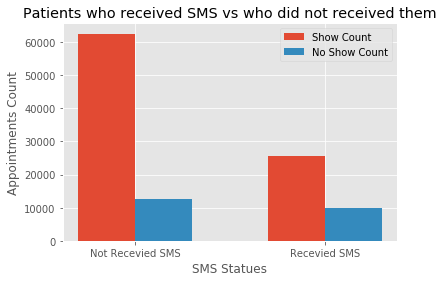

In [107]:
# source http://benalexkeen.com/bar-charts-in-matplotlib/
# visualize the SMS_received with noshow variable by a bar chart.

N = 2
Show_count = (62510, 25698)
Noshow_count = (12535, 9784)

ind2 = np.arange(N) 
width = 0.30      
plt.bar(ind2, Show_count, width, label='Show Count')
plt.bar(ind2 + width, Noshow_count, width,
    label='No Show Count')

plt.ylabel('Appointments Count')
plt.xlabel('SMS Statues')
plt.title('Patients who received SMS vs who did not received them')

plt.xticks(ind2 + width / 2, ('Not Recevied SMS', 'Recevied SMS'))
plt.legend(loc='best')
plt.show()

In [108]:
# old visualize the SMS_received with noshow variable by a bar chart.
# db_nsas.plot(kind='bar', title='Patients who received SMS');

In [109]:
# Group Hipertension with noshow variable, to find the relationship between them.
db_nsah = db_nsa.groupby(['NoShow', 'Hipertension'])['Hipertension'].count()
db_nsah

NoShow  Hipertension
No      0               70179
        1               18029
Yes     0               18547
        1                3772
Name: Hipertension, dtype: int64

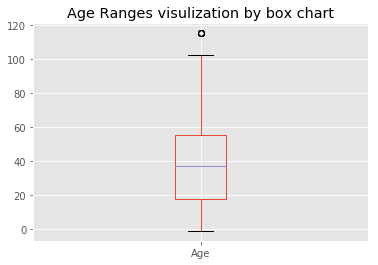

In [110]:
# visualize the age ranges by a box chart.
db_nsa['Age'].plot(kind='box', title='Age Ranges visulization by box chart');

In [111]:
# Group age with noshow to read the count & find a relationship.
db_nsa3 = db_nsa.groupby(['NoShow', 'Age'])['Age'].count()
db_nsa3

NoShow  Age 
No      -1         1
         0      2900
         1      1858
         2      1366
         3      1236
         4      1017
         5      1169
         6      1205
         7      1126
         8      1106
         9      1008
         10      970
         11      948
         12      820
         13      800
         14      802
         15      889
         16     1049
         17     1113
         18     1137
         19     1151
         20     1082
         21     1097
         22     1025
         23     1006
         24      921
         25      980
         26      971
         27     1048
         28     1116
                ... 
Yes      70       94
         71      121
         72      101
         73       96
         74       89
         75       81
         76       91
         77       79
         78       89
         79       61
         80       81
         81       63
         82       66
         83       61
         84       35
         85       49


## Findings
>> Based on the above analysis (NoShow as a dependent variable & others as independents) we found the following:
1. Ages were from different ranges mostly from 0 to 50. The mean & median equal to 37. Almost elderlies have the most no showing rate comparing with the other age ranges.
2. Alcoholism, diabetes and handicap factors have no direct correlation with no showing cases.
3. 18029 of patients who have hypertension showed up to their appointments from 21801 in total. This indicates that this factor has a direct effect & rise a concern to patients to show up at their corresponding appointment as scheduled. 
4. After investigating the relationship between scheduled day and no show variables, we found that Tuesday has the most rate of not showing situations while Saturday & Thursday has the lowest rate.
5. There is a positive correlation between SMS messages and showing up to appointments. Based on the provided records, only 9784 of those who received SMS didn’t show to their appointments out of 35482.



### Q2. What are the significant factors if combine will prevent patients from showing?

In [112]:
# create a dataframe for no showing cases only.
df = db_nsa.loc[db_nsa['NoShow'] == 'Yes']
df.count()

PatientId         22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
NoShow            22319
dtype: int64

In [113]:
# explore the above dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 13 columns):
PatientId         22319 non-null int64
Gender            22319 non-null object
ScheduledDay      22319 non-null object
AppointmentDay    22319 non-null datetime64[ns]
Age               22319 non-null int64
Neighbourhood     22319 non-null object
Scholarship       22319 non-null int64
Hipertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
Handcap           22319 non-null int64
SMS_received      22319 non-null int64
NoShow            22319 non-null object
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 2.4+ MB


In [114]:
# Explore data.
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [115]:
# Display the first 10 rows.
df.head(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
6,733688164476661,F,Wednesday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,F,Wednesday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,M,Tuesday,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,F,Thursday,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,F,Wednesday,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,12154843752835,F,Wednesday,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes
22,863229818887631,M,Monday,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes
31,311284853849,M,Wednesday,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
44,274164858852,F,Thursday,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
48,8545415176986,F,Tuesday,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes


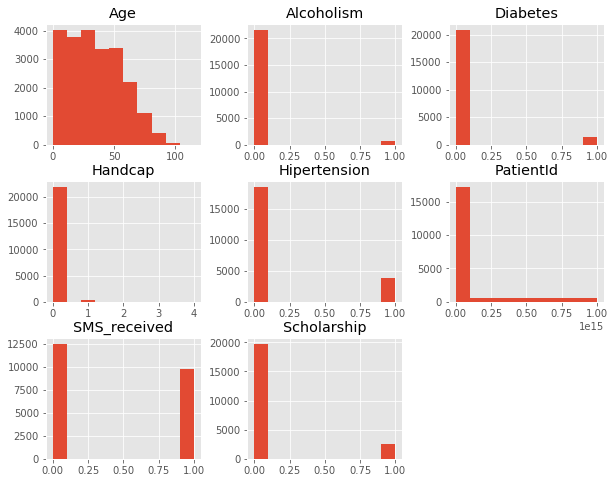

In [116]:
# see the distrbutions of the variables.
df.hist(figsize=(10, 8));

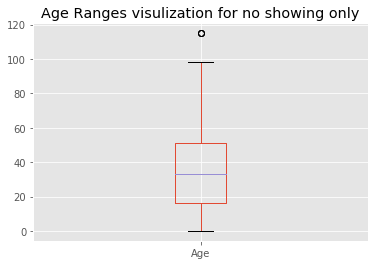

In [117]:
# Box plot of the ages range.
df['Age'].plot(kind='box', title='Age Ranges visulization for no showing only');

Text(0.5, 1.0, 'Disrbution of gender and age for not showing cases only')

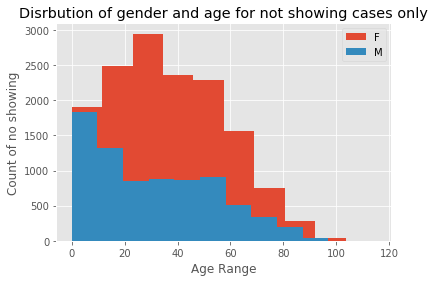

In [118]:
# disrbution using gender and age.
df.groupby('Gender').Age.plot(kind='hist', legend = True);
plt.xlabel('Age Range')
plt.ylabel('Count of no showing')
plt.title('Disrbution of gender and age for not showing cases only')

In [119]:
# scheduled days
days = df.ScheduledDay.value_counts()
days

Tuesday      5291
Wednesday    4879
Monday       4561
Friday       3887
Thursday     3700
Saturday        1
Name: ScheduledDay, dtype: int64

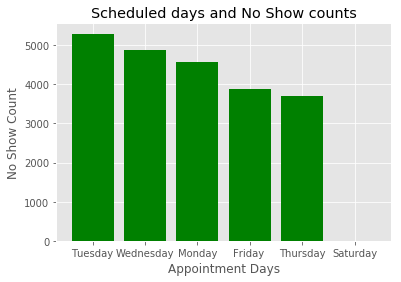

In [120]:
# Bar chart of the scheuled days & no showing counts. 
# Source http://benalexkeen.com/bar-charts-in-matplotlib/

wday = ['Tuesday', 'Wednesday', 'Monday', 'Friday ', 'Thursday', 'Saturday']
NoShow_count = [5291, 4879, 4561, 3887, 3700, 1]

x_pos = [i for i, _ in enumerate(wday)]

plt.bar(x_pos, NoShow_count, color='green')
plt.xlabel("Appointment Days")
plt.ylabel("No Show Count")
plt.title("Scheduled days and No Show counts")

plt.xticks(x_pos, wday)

plt.show()

In [121]:
# gender of no showing break down.
df.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

## Findings
>> Based on the above analysis (NoShow actual cases as a dependent variable & others as independents) we found the following:
1. Females have the most no showing rate comparing with males and based on the histogram distribution females from 24 to 32 years old have the most no showing rate. 
2. Based on the bar chart of defining the relationship between scheduled days and no showing count situations, it appears that Tuesday & Wednesday has the most no showing rate while Thursday & Friday has the lowest rate.



In [122]:
# Save changes to new csv file.
db_nsa.to_csv('new.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> In this project, we investigated many aspects of no showing dataset and we successfully identified the most significant factors of no showing situations that directly have a strong relationship with the patients. At the first section, we cleaned the dataset and we applied minor changes to help us with our analysis. While in the second section, we have been trying to answer our research questions. Based on the analysis, we found a direct correlation between SMS factor with no showing element. The patients who received SMS messages prior to their scheduled appointment days showed up to their corresponding appointments. The second factor was associated with the age range based on the provided data from 0 to 28 age range has the most showing range. Moreover, hipertension, gender and the scheduled day have a partial effect on no showing situations.


> The dataset has some limitations that should be taken into consideration to have more accurate results: 
The dataset covered one year only (2016), as a result, no historical data were presented.
The dataset of showing and not showing variable was not balanced, and this affects the reliability of the findings as some of them were based on assumptions only without accurate evidence. 
The dataset datatype most of them were strings which made it more challenging to represent them in graphes, with even limited functions such as count.
